In [64]:
import numpy as np
from visualization import *

In [65]:
x =   [[-0., -0.,  4., -4., -5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4., -5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  4., -4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]

x = np.array(x)

In [66]:
objects = {"goal1": (4, 6, 4, 6, 4, 6),
           "goal2": (-5, -4, -5, -4, -5, -4),
           "goal3": (-6,-5,4,5,4,5),
           "obstacle1": (-1.5, -0.5, -1.5, -0.5, -1.5, -0.5),
           "obstacle2": (1.0, 2.0, 1.0, 2.0, 1.5, 2.5),
           "obstacle3": (1.0, 2.0, 0.0, 1.0, -1.0, 1.0)}

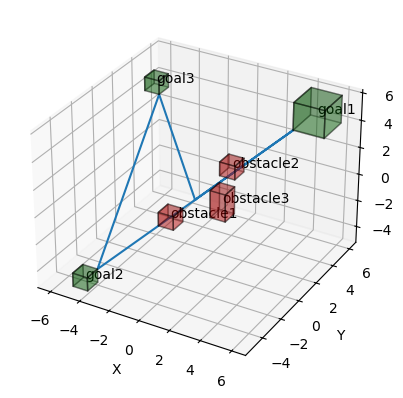

In [67]:
visualizer = Visualization(x, objects)
visualizer.visualize()

In [68]:
def find_center(object):
    xmean = np.mean(object[0:2])
    ymean = np.mean(object[2:4])
    zmean = np.mean(object[4:6])
    return np.array([xmean, ymean, zmean])

In [69]:
centers = np.zeros((len(objects), 3))
for i, key in enumerate(objects):
    centers[i] = find_center(objects[key])

In [70]:
centers

array([[ 5. ,  5. ,  5. ],
       [-4.5, -4.5, -4.5],
       [-5.5,  4.5,  4.5],
       [-1. , -1. , -1. ],
       [ 1.5,  1.5,  2. ],
       [ 1.5,  0.5,  0. ]])

In [71]:
coordinates = x[0:3, :]
print(coordinates)

[[-0. -0.  4. -4. -5.  0.  0.  0.  0.  0.  0.]
 [-0. -0.  4. -4.  4.  0.  0.  0.  0.  0.  0.]
 [-0. -0.  4. -4.  4.  0.  0.  0.  0.  0.  0.]]


In [87]:
# Calculate distance from centers at each point in time
n = coordinates.shape[1]
m = len(centers)
distances = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        distances[i,j] = np.linalg.norm(coordinates[:,i] - centers[j])
        # print("i: ", i, "j: ", j, "coordinates: ", coordinates[:,i], "centers: ", centers[j], "distance: ", distances[i,j])
        


In [85]:
print(distances.shape)
print(distances)

(11, 6)
[[ 8.66025404  7.79422863  8.41130192  1.73205081  2.91547595  1.58113883]
 [ 8.66025404  7.79422863  8.41130192  1.73205081  2.91547595  1.58113883]
 [ 1.73205081 14.72243186  9.52627944  8.66025404  4.0620192   5.87367006]
 [15.58845727  0.8660254  12.11404144  5.19615242  9.82344135  8.15475322]
 [10.09950494 12.03120942  0.8660254   8.1240384   7.24568837  8.39642781]
 [ 8.66025404  7.79422863  8.41130192  1.73205081  2.91547595  1.58113883]
 [ 8.66025404  7.79422863  8.41130192  1.73205081  2.91547595  1.58113883]
 [ 8.66025404  7.79422863  8.41130192  1.73205081  2.91547595  1.58113883]
 [ 8.66025404  7.79422863  8.41130192  1.73205081  2.91547595  1.58113883]
 [ 8.66025404  7.79422863  8.41130192  1.73205081  2.91547595  1.58113883]
 [ 8.66025404  7.79422863  8.41130192  1.73205081  2.91547595  1.58113883]]


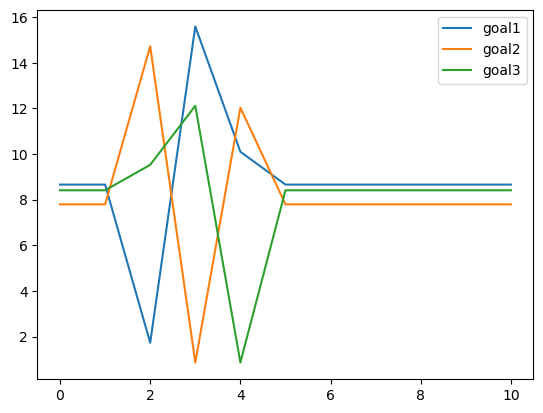

In [88]:
# plot distance to each goal over time
plt.plot(distances[:,0:3])
plt.legend(objects.keys())
plt.show()


In [94]:
# get obstacle keys for legend
obstacle_keys = []
for key in objects.keys():
    if "obstacle" in key:
        obstacle_keys.append(key)

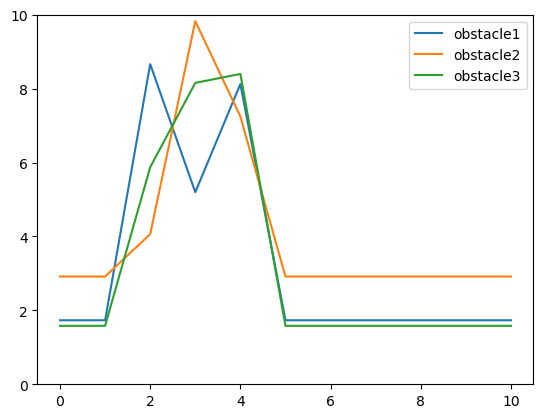

In [97]:
# plot distance to each obstacle over time
plt.plot(distances[:,3:6])
plt.legend(obstacle_keys)
plt.ylim(0, 10)
plt.show()